In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier,plot_importance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,accuracy_score,f1_score,precision_score,recall_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/new_model.csv')
df

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80.0,1.020,0.0,0.0,1.0,49.0,0.5,150.00,4.90,15.7,6700.0,4.90,0.0,0
396,70.0,1.025,0.0,0.0,1.0,31.0,1.2,141.00,3.50,16.5,7800.0,6.20,0.0,0
397,80.0,1.020,0.0,0.0,1.0,26.0,0.6,137.00,4.40,15.8,6600.0,5.40,0.0,0
398,60.0,1.025,0.0,0.0,1.0,50.0,1.0,135.00,4.90,14.2,7200.0,5.90,0.0,0


<Axes: xlabel='Class', ylabel='count'>

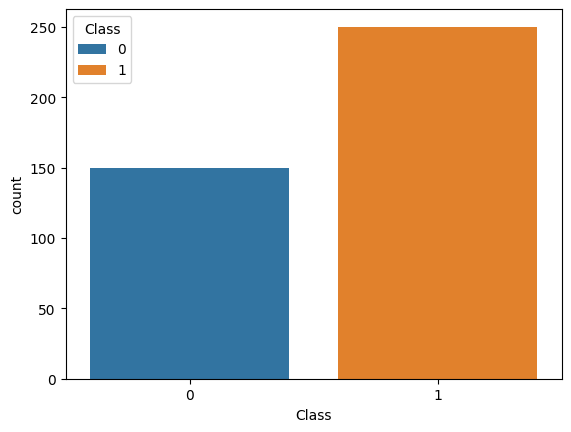

In [5]:
sns.countplot(data=df,x='Class',hue='Class')

In [6]:
df.isnull().sum()

,0
Bp,0
Sg,0
Al,0
Su,0
Rbc,0
Bu,0
Sc,0
Sod,0
Pot,0
Hemo,0


In [7]:
df_maj = df[(df['Class']==0)]
df_min = df[(df['Class']==1)]

df_maj_upsam = resample(df_maj,n_samples=len(df_min),random_state=42)

df2 = pd.concat([df_maj_upsam,df_min])

<Axes: xlabel='Class', ylabel='count'>

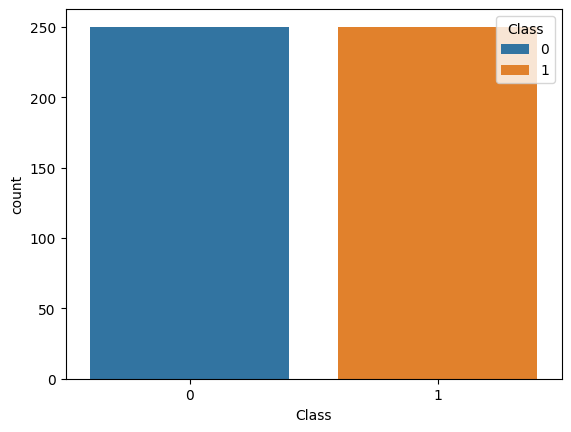

In [8]:
sns.countplot(data=df2,x='Class',hue='Class')

<Axes: xlabel='Bp'>

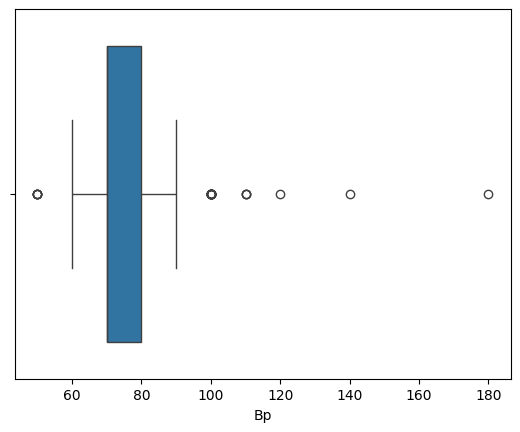

In [9]:
sns.boxplot(x=df2["Bp"])

<Axes: xlabel='Sg'>

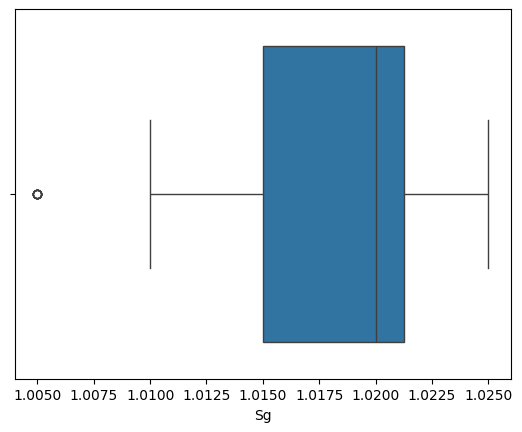

In [10]:
sns.boxplot(x=df2["Sg"])

<Axes: xlabel='Bu'>

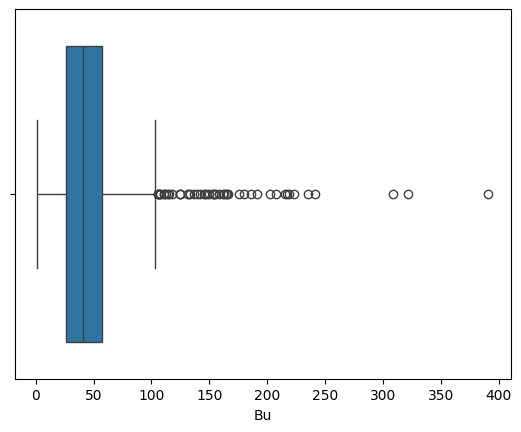

In [11]:
sns.boxplot(x=df2["Bu"])

<Axes: xlabel='Sc'>

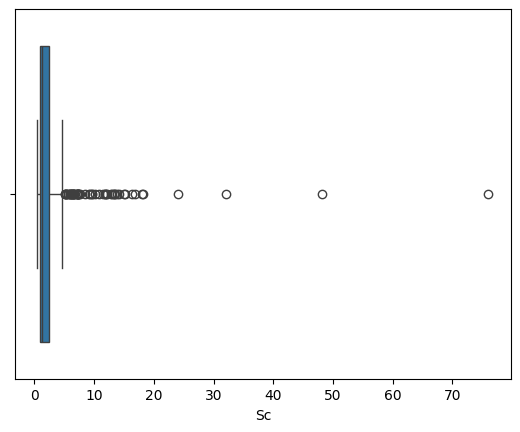

In [12]:
sns.boxplot(x=df2["Sc"])

<Axes: xlabel='Sod'>

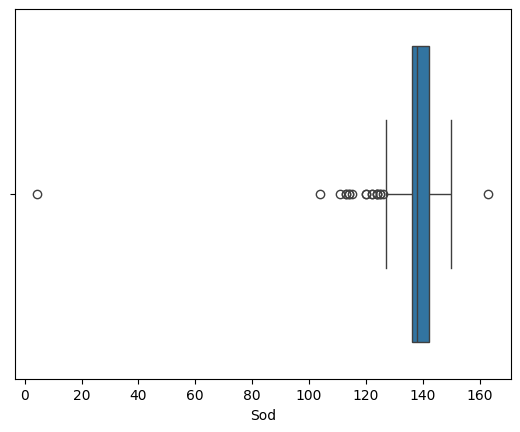

In [14]:
sns.boxplot(x=df2["Sod"])

<Axes: xlabel='Pot'>

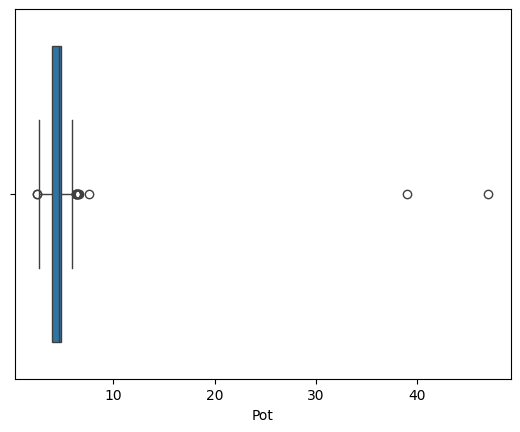

In [15]:
sns.boxplot(x=df2["Pot"])

In [16]:
z = np.abs(stats.zscore(df2))
df = df2[(z<3).all(axis=1)]
df.shape

(420, 14)

<Axes: >

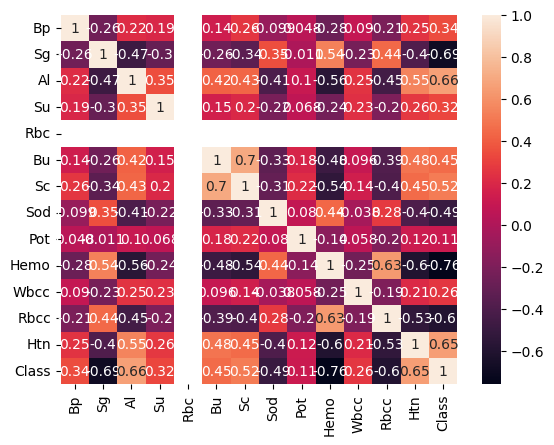

In [17]:
sns.heatmap(df.corr(),annot=True,fmt='.2g')

In [18]:
df = df.drop('Rbc',axis=1)

In [19]:
x = df.drop('Class',axis=1)
y = df['Class']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)

print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [24]:
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  1.0
Precision Score :  1.0
Recall Score :  1.0


In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

print(accuracy_score(y_test,y_pred))

0.7380952380952381


In [26]:
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.6333333333333333
Precision Score :  0.7307692307692307
Recall Score :  0.5588235294117647


In [27]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(x_train,y_train)
y_pred = abc.predict(x_test)

print(accuracy_score(y_test,y_pred))

0.9880952380952381


In [28]:
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.9850746268656716
Precision Score :  1.0
Recall Score :  0.9705882352941176


Text(0.5, 1.0, 'Accuracy Score: 98.80952380952381')

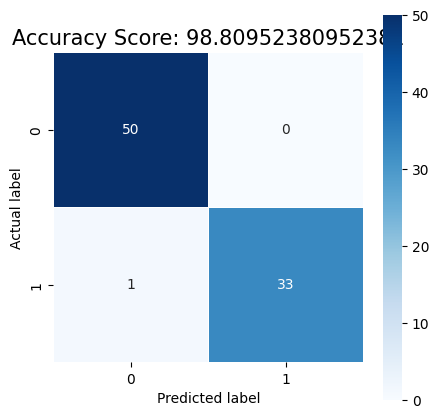

In [30]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(abc.score(x_test, y_test)*100)
plt.title(all_sample_title, size = 15)

In [31]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

print(accuracy_score(y_test,y_pred))

0.9523809523809523


In [32]:
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.9393939393939394
Precision Score :  0.96875
Recall Score :  0.9117647058823529


Text(0.5, 1.0, 'Accuracy Score: 95.23809523809523')

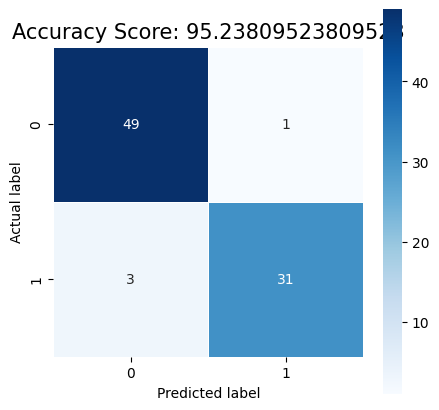

In [33]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(lr.score(x_test, y_test)*100)
plt.title(all_sample_title, size = 15)